In [1]:
import warnings
warnings.filterwarnings('ignore')
import os
import pydataset

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import sklearn.preprocessing
from sklearn.model_selection import train_test_split

import mason_functions as mf
import acquireTelco as aT
import prepareTelco as pT

# Scale it

Do your work for these exercises in a jupyter notebook named scaling. Use the telco dataset you acquired and prepped in previous lesson. Once you are finished, you may wish to repeat the exercises on another dataset for additional practice.

In [2]:
#grab prepped data
telco = pT.prep_telco()

In [3]:
#at a glance
print(telco.info())
telco.head()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 2794-XIMMO to 9764-REAFF
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   is_male                   7032 non-null   uint8  
 1   senior_citizen            7032 non-null   int64  
 2   partner                   7032 non-null   int64  
 3   dependents                7032 non-null   int64  
 4   phone_service             7032 non-null   int64  
 5   paperless_billing         7032 non-null   int64  
 6   churn                     7032 non-null   int64  
 7   tenure                    7032 non-null   int64  
 8   monthly_charges           7032 non-null   float64
 9   total_charges             7032 non-null   float64
 10  multiple_lines            7032 non-null   uint8  
 11  online_security           7032 non-null   uint8  
 12  online_backup             7032 non-null   uint8  
 13  device_protection         7032 non-null   uint8  
 14

,is_male,senior_citizen,partner,dependents,phone_service,paperless_billing,churn,tenure,monthly_charges,total_charges,...,m2m_contract,one_year_contract,two_year_contract,DSL_internet,Fiber_internet,no_internet,bank_auto_payment,card_auto_payment,electronic_check_payment,mailed_check_payment
customer_id,,,,,,,,,,,,,,,,,,,,,
2794-XIMMO,1,0,1,0,0,1,1,53,60.45,3184.25,...,0,1,0,1,0,0,0,0,1,0
2851-STERV,1,1,0,0,1,1,0,35,73.00,2471.25,...,0,1,0,1,0,0,0,0,1,0
2898-LSJGD,0,0,1,1,0,1,1,21,55.95,1157.05,...,0,1,0,1,0,0,0,0,1,0
2969-WGHQO,0,0,1,1,1,0,0,7,69.45,477.05,...,0,1,0,1,0,0,0,0,1,0
2988-PLAHS,0,0,0,0,1,1,0,3,69.95,220.45,...,0,1,0,1,0,0,0,0,1,0


In [4]:
#identify continuous variables
quant_vars = telco.columns[telco.nunique() > 2].to_list()
quant_vars

['tenure', 'monthly_charges', 'total_charges']

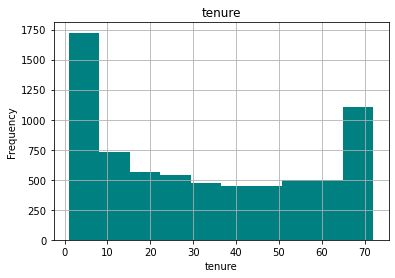

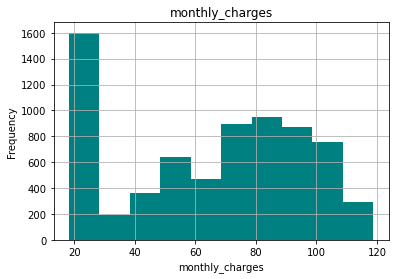

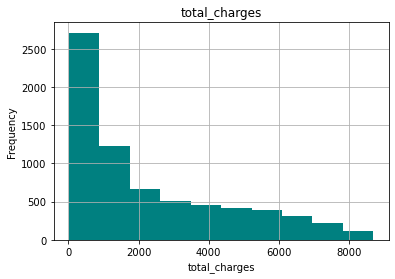

In [5]:
#a glance at distributions before splitting the data (because I feel like it)
for cat in quant_vars:
    telco[cat].hist(color = 'teal')
    plt.title(cat)
    plt.xlabel(cat)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show();

## Exercise I
Apply the scalers we talked about in this lesson to your data and visualize the results for the unscaled and scaled distribution.

In [6]:
#split the data
train, validate, test = pT.split_telco(telco)

### Min-Max Scaler

In [7]:
#create the object
scaler = sklearn.preprocessing.MinMaxScaler()

#fit the object (learn min and max)
scaler.fit(train[quant_vars])

#use the object (use min and max to transform)
train_mm_scaled = scaler.transform(train[quant_vars])

In [8]:
#does it look ok?
train_mm_scaled[:6]

array([[0.97183099, 0.67914172, 0.68444314],
       [0.28169014, 0.01197605, 0.0428747 ],
       [0.21126761, 0.55339321, 0.146014  ],
       [0.36619718, 0.69760479, 0.28258875],
       [1.        , 0.95459082, 0.97500563],
       [0.02816901, 0.72954092, 0.02585983]])

In [9]:
#assign the scaled values as new columns in the train
train[['tenure_scaled', 'monthly_charges_scaled', 'total_charges_scaled']] = train_mm_scaled

In [10]:
#how does it look?
train.head()

,is_male,senior_citizen,partner,dependents,phone_service,paperless_billing,churn,tenure,monthly_charges,total_charges,...,DSL_internet,Fiber_internet,no_internet,bank_auto_payment,card_auto_payment,electronic_check_payment,mailed_check_payment,tenure_scaled,monthly_charges_scaled,total_charges_scaled
customer_id,,,,,,,,,,,,,,,,,,,,,
6695-AMZUF,0,0,1,0,1,0,0,70,86.45,5950.20,...,1,0,0,0,1,0,0,0.971831,0.679142,0.684443
4703-MQYKT,1,0,0,0,1,0,0,21,19.60,390.40,...,0,0,1,0,0,0,1,0.281690,0.011976,0.042875
4652-NNHNY,1,0,1,0,1,1,1,16,73.85,1284.20,...,0,1,0,1,0,0,0,0.211268,0.553393,0.146014
0504-HHAPI,0,1,0,0,1,0,1,27,88.30,2467.75,...,0,1,0,0,1,0,0,0.366197,0.697605,0.282589
4376-KFVRS,1,0,1,1,1,1,0,72,114.05,8468.20,...,0,1,0,0,1,0,0,1.000000,0.954591,0.975006


In [11]:
#assign scaled values to validate and test sets (transform only)
validate[['tenure_scaled', 'monthly_charges_scaled', 'total_charges_scaled']]= scaler.transform(validate[quant_vars])
test[['tenure_scaled', 'monthly_charges_scaled', 'total_charges_scaled']] = scaler.transform(test[quant_vars])

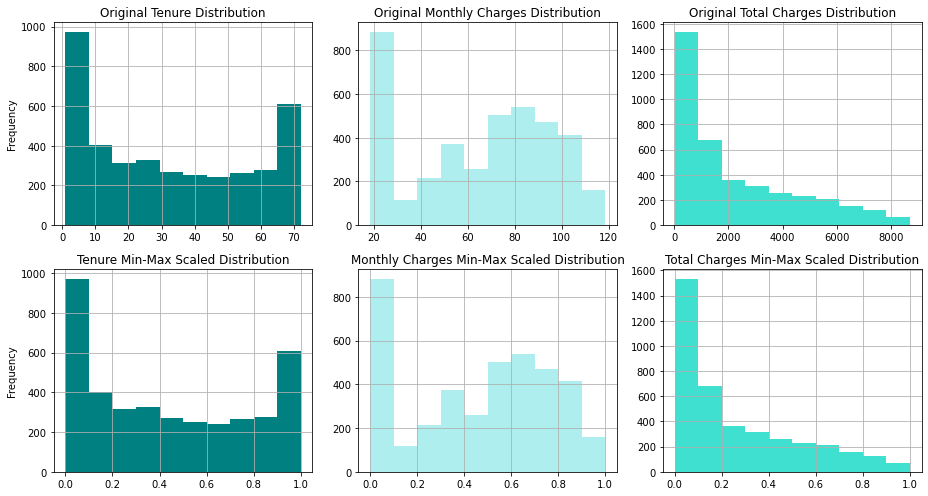

In [12]:
#visualize scaled vs unscaled

#create figure
plt.figure(figsize = (13, 7))

#subplot 1
plt.subplot(231)
train.tenure.hist(color = 'teal')
plt.title('Original Tenure Distribution')
plt.ylabel('Frequency')

#subplot 2
plt.subplot(234)
train.tenure_scaled.hist(color = 'teal')
plt.title('Tenure Min-Max Scaled Distribution')
plt.ylabel('Frequency')

#subplot 3
plt.subplot(232)
train.monthly_charges.hist(color = 'paleturquoise')
plt.title('Original Monthly Charges Distribution')


#subplot 4
plt.subplot(235)
train.monthly_charges_scaled.hist(color = 'paleturquoise')
plt.title('Monthly Charges Min-Max Scaled Distribution')

#subplot 5
plt.subplot(233)
train.total_charges.hist(color = 'turquoise')
plt.title('Original Total Charges Distribution')

#subplot 6
plt.subplot(236)
train.total_charges_scaled.hist(color = 'turquoise')
plt.title('Total Charges Min-Max Scaled Distribution')

plt.tight_layout();

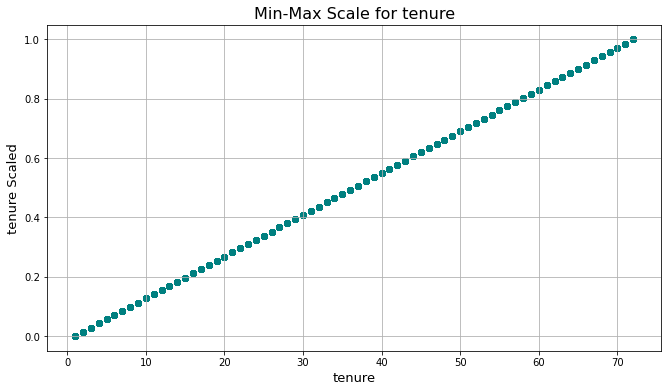

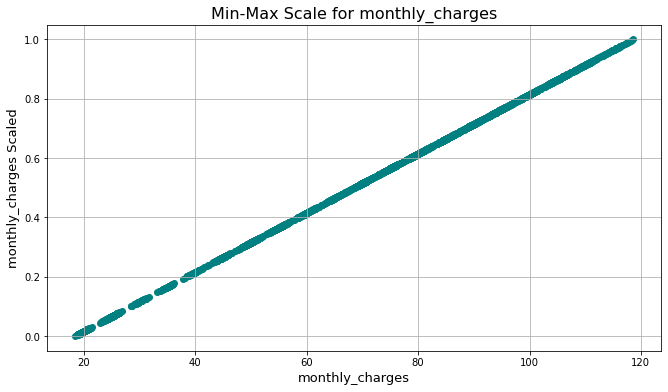

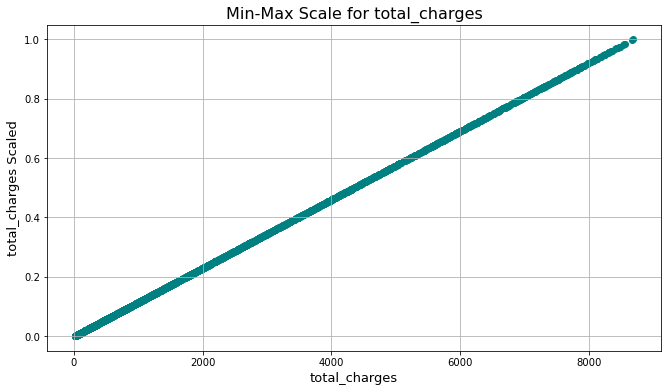

In [13]:
#visualize the scale
for cat in quant_vars:
    plt.figure(figsize = (11, 6))
    plt.scatter(train[cat], train[f'{cat}_scaled'], color = 'teal')
    plt.xlabel(cat, size = 13)
    plt.ylabel(f'{cat} Scaled', size = 13)
    plt.title(f'Min-Max Scale for {cat}', size = 16)
    plt.grid(True);

In [14]:
#revert data back to original scale
scaler.inverse_transform(train_mm_scaled)

array([[7.0000e+01, 8.6450e+01, 5.9502e+03],
       [2.1000e+01, 1.9600e+01, 3.9040e+02],
       [1.6000e+01, 7.3850e+01, 1.2842e+03],
       ...,
       [1.0000e+01, 5.4500e+01, 5.6820e+02],
       [1.0000e+00, 7.2100e+01, 7.2100e+01],
       [1.1000e+01, 8.9200e+01, 9.9030e+02]])

In [15]:
#how does my inverse transformed data compare to the original data?
train[quant_vars]

,tenure,monthly_charges,total_charges
customer_id,,,
6695-AMZUF,70,86.45,5950.20
4703-MQYKT,21,19.60,390.40
4652-NNHNY,16,73.85,1284.20
0504-HHAPI,27,88.30,2467.75
4376-KFVRS,72,114.05,8468.20
...,...,...,...
0679-IDSTG,1,69.25,69.25
0156-FVPTA,22,54.20,1152.70
7966-YOTQW,10,54.50,568.20


### Standard Scaler

In [16]:
#create the object
scaler = sklearn.preprocessing.StandardScaler()

#fit the object
scaler.fit(train[quant_vars])

#use the object
train_std_scaled = scaler.transform(train[quant_vars])
train[['tenure_scaled', 'monthly_charges_scaled', 'total_charges_scaled']] = train_std_scaled
validate[['tenure_scaled', 'monthly_charges_scaled', 'total_charges_scaled']] = scaler.transform(validate[quant_vars])
test[['tenure_scaled', 'monthly_charges_scaled', 'total_charges_scaled']] = scaler.transform(test[quant_vars])

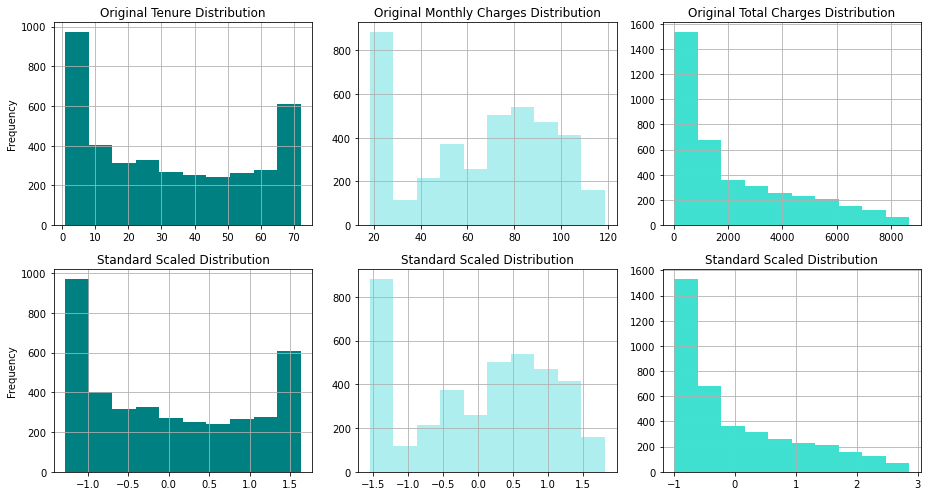

In [17]:
#visualize scaled vs unscaled

#create figure
plt.figure(figsize = (13, 7))

#subplot 1
plt.subplot(231)
train.tenure.hist(color = 'teal')
plt.title('Original Tenure Distribution')
plt.ylabel('Frequency')

#subplot 2
plt.subplot(234)
train.tenure_scaled.hist(color = 'teal')
plt.title('Standard Scaled Distribution')
plt.ylabel('Frequency')

#subplot 3
plt.subplot(232)
train.monthly_charges.hist(color = 'paleturquoise')
plt.title('Original Monthly Charges Distribution')


#subplot 4
plt.subplot(235)
train.monthly_charges_scaled.hist(color = 'paleturquoise')
plt.title('Standard Scaled Distribution')

#subplot 5
plt.subplot(233)
train.total_charges.hist(color = 'turquoise')
plt.title('Original Total Charges Distribution')

#subplot 6
plt.subplot(236)
train.total_charges_scaled.hist(color = 'turquoise')
plt.title('Standard Scaled Distribution')

plt.tight_layout();

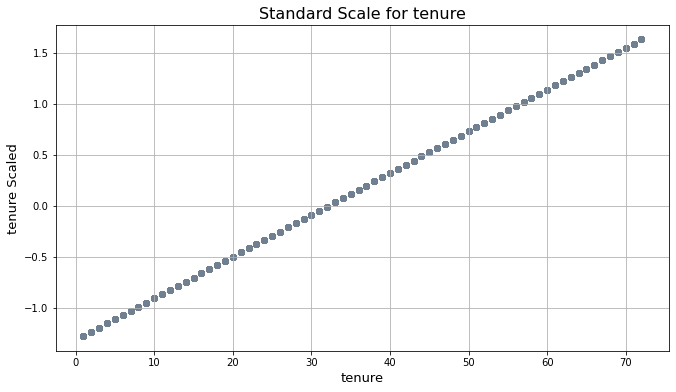

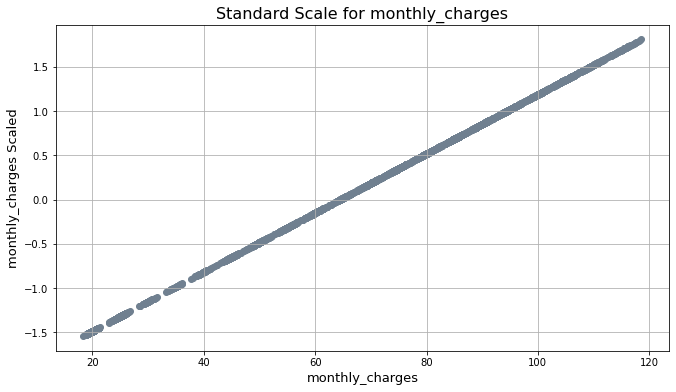

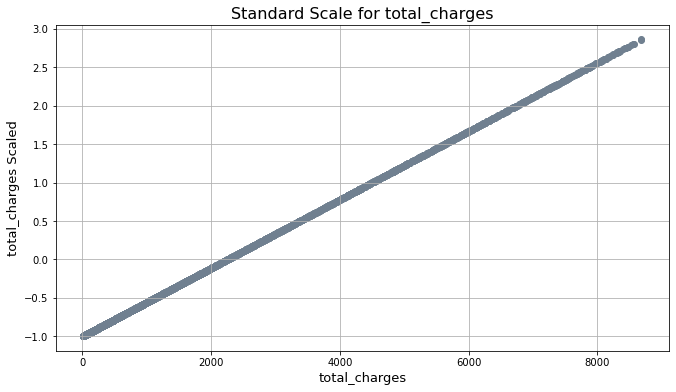

In [18]:
#visualize the scale
for cat in quant_vars:
    plt.figure(figsize = (11, 6))
    plt.scatter(train[cat], train[f'{cat}_scaled'], color = 'slategray')
    plt.xlabel(cat, size = 13)
    plt.ylabel(f'{cat} Scaled', size = 13)
    plt.title(f'Standard Scale for {cat}', size = 16)
    plt.grid(True);

In [19]:
#a look at the data inverse transformed
scaler.inverse_transform(train_std_scaled)

array([[7.0000e+01, 8.6450e+01, 5.9502e+03],
       [2.1000e+01, 1.9600e+01, 3.9040e+02],
       [1.6000e+01, 7.3850e+01, 1.2842e+03],
       ...,
       [1.0000e+01, 5.4500e+01, 5.6820e+02],
       [1.0000e+00, 7.2100e+01, 7.2100e+01],
       [1.1000e+01, 8.9200e+01, 9.9030e+02]])

In [20]:
#how does my inverse transformed data compare to the original data?
train[quant_vars]

,tenure,monthly_charges,total_charges
customer_id,,,
6695-AMZUF,70,86.45,5950.20
4703-MQYKT,21,19.60,390.40
4652-NNHNY,16,73.85,1284.20
0504-HHAPI,27,88.30,2467.75
4376-KFVRS,72,114.05,8468.20
...,...,...,...
0679-IDSTG,1,69.25,69.25
0156-FVPTA,22,54.20,1152.70
7966-YOTQW,10,54.50,568.20


### Robust Scaler

In [21]:
#create the object
scaler = sklearn.preprocessing.RobustScaler()

#fit the object
scaler.fit(train[quant_vars])

#use the object
train_bust_scaled = scaler.transform(train[quant_vars])
train[['tenure_scaled', 'monthly_charges_scaled', 'total_charges_scaled']] = train_bust_scaled
validate[['tenure_scaled', 'monthly_charges_scaled', 'total_charges_scaled']] = scaler.transform(validate[quant_vars])
test[['tenure_scaled', 'monthly_charges_scaled', 'total_charges_scaled']] = scaler.transform(test[quant_vars])

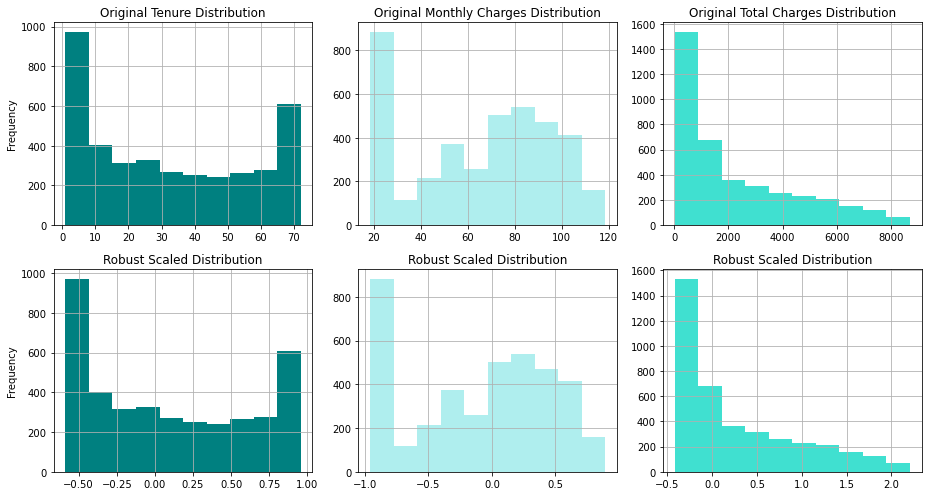

In [22]:
#visualize scaled vs unscaled

#create figure
plt.figure(figsize = (13, 7))

#subplot 1
plt.subplot(231)
train.tenure.hist(color = 'teal')
plt.title('Original Tenure Distribution')
plt.ylabel('Frequency')

#subplot 2
plt.subplot(234)
train.tenure_scaled.hist(color = 'teal')
plt.title('Robust Scaled Distribution')
plt.ylabel('Frequency')

#subplot 3
plt.subplot(232)
train.monthly_charges.hist(color = 'paleturquoise')
plt.title('Original Monthly Charges Distribution')


#subplot 4
plt.subplot(235)
train.monthly_charges_scaled.hist(color = 'paleturquoise')
plt.title('Robust Scaled Distribution')

#subplot 5
plt.subplot(233)
train.total_charges.hist(color = 'turquoise')
plt.title('Original Total Charges Distribution')

#subplot 6
plt.subplot(236)
train.total_charges_scaled.hist(color = 'turquoise')
plt.title('Robust Scaled Distribution')

plt.tight_layout();

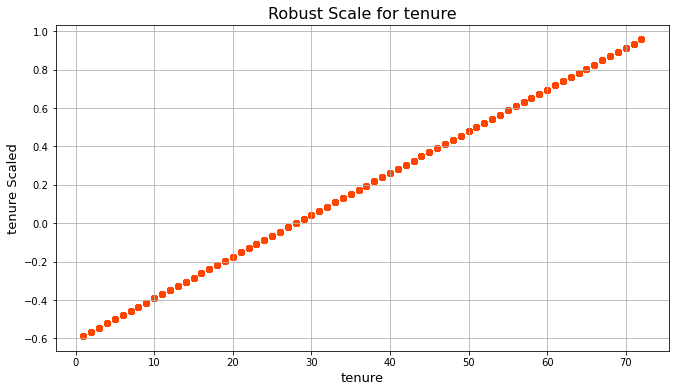

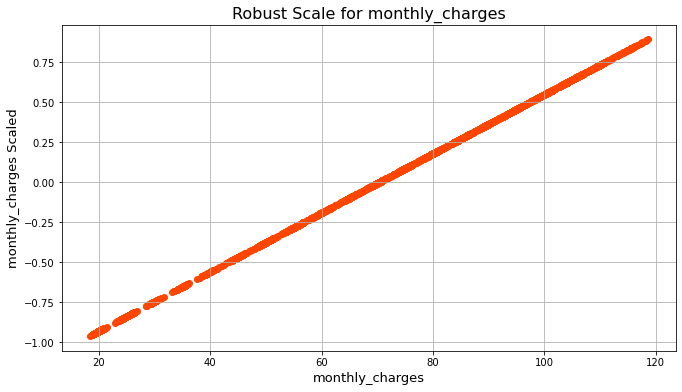

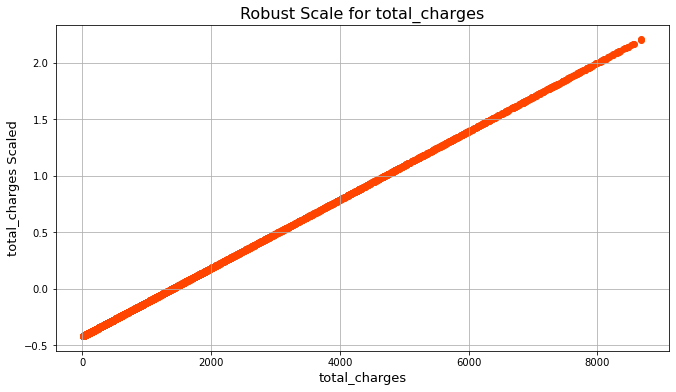

In [23]:
#visualize the scale
for cat in quant_vars:
    plt.figure(figsize = (11, 6))
    plt.scatter(train[cat], train[f'{cat}_scaled'], color = 'orangered')
    plt.xlabel(cat, size = 13)
    plt.ylabel(f'{cat} Scaled', size = 13)
    plt.title(f'Robust Scale for {cat}', size = 16)
    plt.grid(True);

### Exercise II
Apply the .inverse_transform method to your scaled data. Is the resulting dataset the exact same as the original data?

In [24]:
#inverse transform my data
#note: I could not inverse transform until I specified all of the columns I had previously scaled (transformed)
scaler.inverse_transform(train_bust_scaled)

array([[7.0000e+01, 8.6450e+01, 5.9502e+03],
       [2.1000e+01, 1.9600e+01, 3.9040e+02],
       [1.6000e+01, 7.3850e+01, 1.2842e+03],
       ...,
       [1.0000e+01, 5.4500e+01, 5.6820e+02],
       [1.0000e+00, 7.2100e+01, 7.2100e+01],
       [1.1000e+01, 8.9200e+01, 9.9030e+02]])

In [25]:
#how does my inverse transformed data compare to the original data?
train['tenure']
#looks like the original to me

customer_id
6695-AMZUF    70
4703-MQYKT    21
4652-NNHNY    16
0504-HHAPI    27
4376-KFVRS    72
              ..
0679-IDSTG     1
0156-FVPTA    22
7966-YOTQW    10
0021-IKXGC     1
1173-XZPYF    11
Name: tenure, Length: 3937, dtype: int64

### Exercise III
Read the documentation for sklearn's QuantileTransformer. Use normal for the output_distribution and apply this scaler to your data. Visualize the result of your data scaling.

In [ ]:
#I wanted to define my parameter here
n_samples = len(train)

#create the object
scaler = sklearn.preprocessing.QuantileTransformer(n_quantiles = n_samples, output_distribution = 'normal')

#fit the object
scaler.fit(train[quant_vars])

#use the object
train_quant_scaled = scaler.transform(train[quant_var])
train_bust_scaled = scaler.transform(train[quant_vars])
train[['tenure_scaled', 'monthly_charges_scaled', 'total_charges_scaled']] = train_quant_scaled
validate[['tenure_scaled', 'monthly_charges_scaled', 'total_charges_scaled']] = scaler.transform(validate[quant_vars])
test[['tenure_scaled', 'monthly_charges_scaled', 'total_charges_scaled']] = scaler.transform(test[quant_vars])

### Exercise IV
Use the QuantileTransformer, but omit the output_distribution argument. Visualize your results. What do you notice?

### Exercise V
Based on the work you've done, choose a scaling method for your dataset. Write a function within your prepare.py that accepts as input the train, validate, and test data splits, and returns the scaled versions of each. Be sure to only learn the parameters for scaling from your training data!